<a href="https://colab.research.google.com/github/yunajo-i8/machine-learning/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_image%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3530 - loss: 1.7684 - val_accuracy: 0.5240 - val_loss: 1.3395
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5727 - loss: 1.2043 - val_accuracy: 0.5864 - val_loss: 1.1613
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6293 - loss: 1.0555 - val_accuracy: 0.6208 - val_loss: 1.0740
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6709 - loss: 0.9344 - val_accuracy: 0.6055 - val_loss: 1.1578
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6945 - loss: 0.8618 - val_accuracy: 0.6418 - val_loss: 1.0315
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7165 - loss: 0.8027 - val_accuracy: 0.6313 - val_loss: 1.0769
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7425 - loss: 0.7366 - val_accuracy: 0.6505 - val_loss: 1.0297
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7616 - loss: 0.6775 -

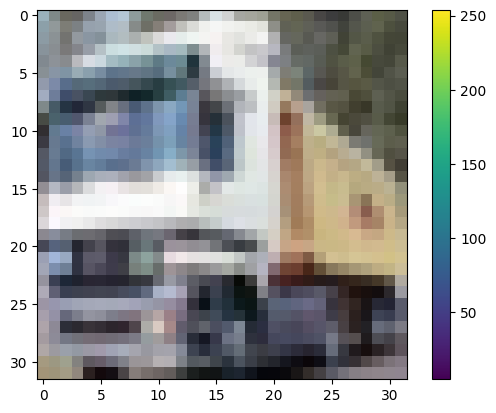

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

# CIFAR-10 데이터 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN 모델
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    Flatten(),
    Dense(80, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.3)


First, we need to download the 'Dogs vs. Cats' dataset from Kaggle. Please follow these steps to set up your Kaggle API key:

1.  Go to [Kaggle.com](https://www.kaggle.com/).
2.  Log in or register.
3.  Click on your profile picture in the top right corner and select 'My Account'.
4.  Scroll down to the 'API' section and click 'Create New API Token'. This will download a `kaggle.json` file.
5.  In Colab, go to the 'Files' tab (folder icon on the left panel), click 'Upload to session storage' (upload icon), and upload your `kaggle.json` file. Alternatively, you can use `colab.files.upload()` to upload the file.

Once `kaggle.json` is uploaded, run the following cells.

In [ ]:
import os
from google.colab import files

# Create a .kaggle directory if it doesn't exist
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Check if kaggle.json exists in the current directory. If not, prompt user to upload.
if not os.path.exists('kaggle.json'):
    print("Please upload your kaggle.json file. Click 'Choose Files' below.")
    uploaded = files.upload()
    if 'kaggle.json' not in uploaded:
        print("kaggle.json was not uploaded. Please upload it to proceed.")
        # If the user doesn't upload, the subsequent !mv will fail, which is expected.

# Move the uploaded kaggle.json to the correct directory
# This assumes it's now in the current working directory after upload or was there initially.
if os.path.exists('kaggle.json'):
    !mv kaggle.json /root/.kaggle/
else:
    print("kaggle.json not found in current directory. Cannot move to /root/.kaggle/")

# Set permissions only if the file exists in the target directory
if os.path.exists('/root/.kaggle/kaggle.json'):
    !chmod 600 /root/.kaggle/kaggle.json
else:
    print("Cannot set permissions: /root/.kaggle/kaggle.json not found after move attempt.")

# Install Kaggle API client
!pip install kaggle

Please upload your kaggle.json file. Click 'Choose Files' below.


Saving 5.png to 5.png
kaggle.json was not uploaded. Please upload it to proceed.
kaggle.json not found in current directory. Cannot move to /root/.kaggle/
Cannot set permissions: /root/.kaggle/kaggle.json not found after move attempt.


Now we can download the 'Dogs vs. Cats' dataset. This dataset is quite large, so it might take some time to download and extract.

In [ ]:
# Download the dataset
!kaggle datasets download -d chetankv/dogs-cats-images

# Unzip the dataset
!unzip -q dogs-cats-images.zip -d .

# The dataset typically extracts into 'dog and cat/training_set' and 'dog and cat/test_set'
# We need to create a structure like 'PetImages/train/dog', 'PetImages/train/cat', etc.

import shutil

base_dir = './PetImages'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(os.path.join(train_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dog'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cat'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dog'), exist_ok=True)

# Move training images
for category in ['cats', 'dogs']:
    src_path = f'./dog and cat/training_set/{category}'
    dest_path = os.path.join(train_dir, 'cat' if category == 'cats' else 'dog')
    for img_name in os.listdir(src_path):
        shutil.move(os.path.join(src_path, img_name), os.path.join(dest_path, img_name))

# Move test images
for category in ['cats', 'dogs']:
    src_path = f'./dog and cat/test_set/{category}'
    dest_path = os.path.join(test_dir, 'cat' if category == 'cats' else 'dog')
    for img_name in os.listdir(src_path):
        shutil.move(os.path.join(src_path, img_name), os.path.join(dest_path, img_name))

# Clean up original extracted directories
shutil.rmtree('./dog and cat')

print("Dataset prepared successfully in ./PetImages/")

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open dogs-cats-images.zip, dogs-cats-images.zip.zip or dogs-cats-images.zip.ZIP.


FileNotFoundError: [Errno 2] No such file or directory: './dog and cat/training_set/cats'

To fix the `FileNotFoundError` for `dog.jpg` in a later cell, I'll download a sample image.

In [ ]:
import requests

# Download a sample dog image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/b/b3/Dog_standing_on_a_rock.jpg'
response = requests.get(image_url)

with open('dog.jpg', 'wb') as f:
    f.write(response.content)

print("Downloaded dog.jpg")

Downloaded dog.jpg


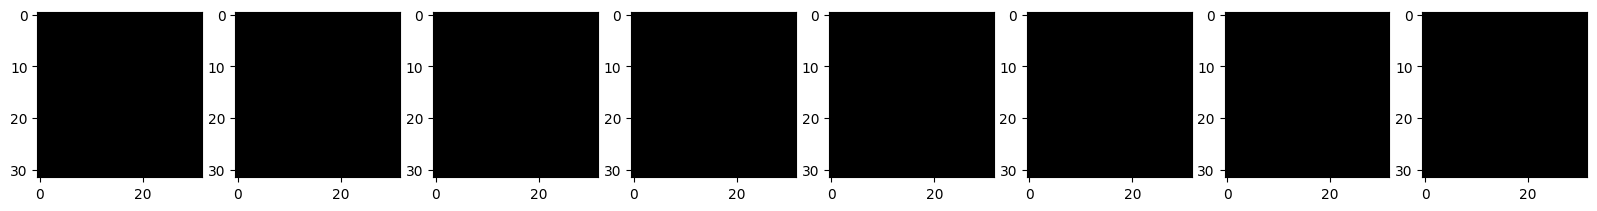

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1., # 이미 정규화된 X_train을 위해 1.0으로 설정합니다.
    rotation_range=90,
    brightness_range=[0.8, 1.0],
    width_shift_range=0.2,
    zoom_range=[0.8, 1.2],
    height_shift_range=0.2
)

sample = np.expand_dims(X_train[0], axis=0)
obj = datagen.flow(sample, batch_size=1)

fig = plt.figure(figsize=(20,5))
for i in range(8):
    plt.subplot(1,8,i+1)
    img = next(obj)
    plt.imshow(img[0])
plt.show()

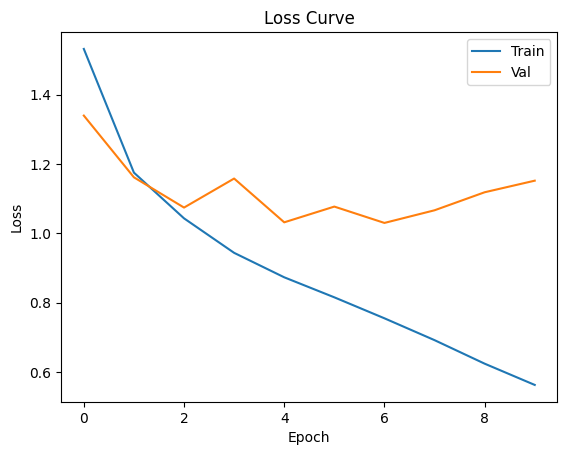

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
정답 = [3]
예측(softmax 출력) = [2.6847265e-04 4.1970679e-07 1.4776901e-03 8.4712964e-01 4.3821399e-04
 2.4315245e-02 5.0535418e-02 4.4257959e-06 7.5826578e-02 4.0384234e-06]


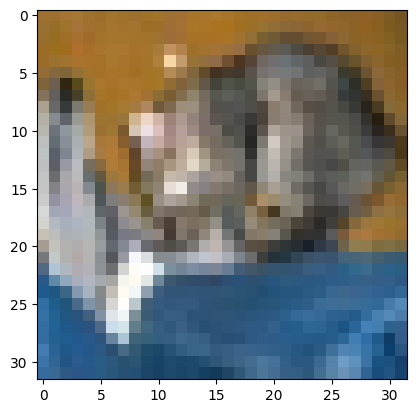

In [ ]:
plt.imshow(X_test[0])
y_pred = model.predict(X_test)

print("정답 =", y_test[0])
print("예측(softmax 출력) =", y_pred[0])


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img("dog.jpg")
array = img_to_array(image)
sample = expand_dims(array, axis=0)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e136f5f08b0>

In [ ]:
train_dir = './PetImages/train'
test_dir = './PetImages/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=20,
    class_mode='binary'
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np

test_input = np.random.random((128,32))
test_target = np.random.random((128,1))

inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
func_model = tf.keras.Model(inputs, outputs)

func_model.compile(optimizer='adam', loss='mean_squared_error')
func_model.fit(test_input, test_target, epochs=3)

# 모델 저장 시 '.keras' 또는 '.h5' 확장자를 붙여야 합니다.
func_model.save("my_model.keras") # .keras 확장자를 사용하여 저장합니다.

loaded = tf.keras.models.load_model("my_model.keras") # 로드할 때도 확장자를 사용합니다.
loaded.fit(test_input, test_target, epochs=3)

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3467  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3123 
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2970 
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2886  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2527 
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2521 


In [ ]:
!pip install pillow
!pip install matplotlib

In [ ]:
from matplotlib import pyplot
from matplotlib.image import imread

image = imread('./PetImages/train/dog/1.jpg')
pyplot.imshow(image)
pyplot.show()

FileNotFoundError: [Errno 2] No such file or directory: './PetImages/train/dog/1.jpg'

In [ ]:
from tensorflow.keras import models, layers

train_dir = './PetImages/train'
test_dir = './PetImages/test'

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

base_model = MobileNet(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

for layer in model.layers[:20]:
    layer.trainable = False
for layer in model.layers[20:]:
    layer.trainable = True

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    './PetImages/',
    target_size=(128,128),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

step_size_train = train_generator.n // train_generator.batch_size

model.fit(
    x=train_generator,
    steps_per_epoch=step_size_train,
    epochs=5
)


/tmp/ipython-input-1431201412.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 0 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


NameError: name 'plt' is not defined

In [ ]:
import numpy as np
import tensorflow as tf

test_input = np.random.random((128,32))
test_target = np.random.random((128,1))

inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(test_input, test_target, epochs=3)

model.save("my_model.keras") # .keras 확장자를 사용하여 저장합니다.

saved_model = tf.keras.models.load_model("my_model.keras") # 로드할 때도 확장자를 사용합니다.
saved_model.fit(test_input, test_target, epochs=3)

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4777 
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2355
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1224
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0233 
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0335 
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8134


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('예측:', decode_predictions(preds, top=3)[0])


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'dog.jpg'

## 핵심 주제

**이미지 인식 CNN 전체 파이프라인**

---

## 1️⃣ CIFAR-10 이미지 분류 CNN

- 데이터 로드
- 이미지 시각화
- 정규화
- CNN 모델 구성
    - Conv2D
    - MaxPooling
    - Flatten
    - Dense
    - Softmax
- 모델 학습
- validation_split
- Loss curve 시각화
- 예측 결과 확인

---

## 2️⃣ 데이터 증강(Data Augmentation)

- ImageDataGenerator
    - 회전
    - 밝기 변화
    - 이동
    - zoom
- 여러 이미지 생성 후 시각화

---

## 3️⃣ Kaggle 데이터셋 사용

- kaggle API 설정
- dogs-cats 이미지 다운로드
- 압축 해제
- 데이터셋 구조 재구성

```
PetImages/
 ├─ train/
 │   ├─ cat
 │   └─ dog
 └─ test/
     ├─ cat
     └─ dog
```

➡️ 실제 프로젝트에서 사용하는 방식

---

## 4️⃣ flow_from_directory

- 디렉토리 기반 데이터 로딩
- 자동 라벨링
- binary classification 준비

---

## 5️⃣ 외부 이미지 입력

- requests로 dog 이미지 다운로드
- load_img → img_to_array
- 모델 입력 형태 변환

---

## 6️⃣ CNN 학습 흐름 이해

- 특징 추출
- pooling
- flatten
- dense 분류
- softmax 확률 출력